In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

c:\Python310\lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.22.3)
  from scipy.sparse import csr_matrix, issparse


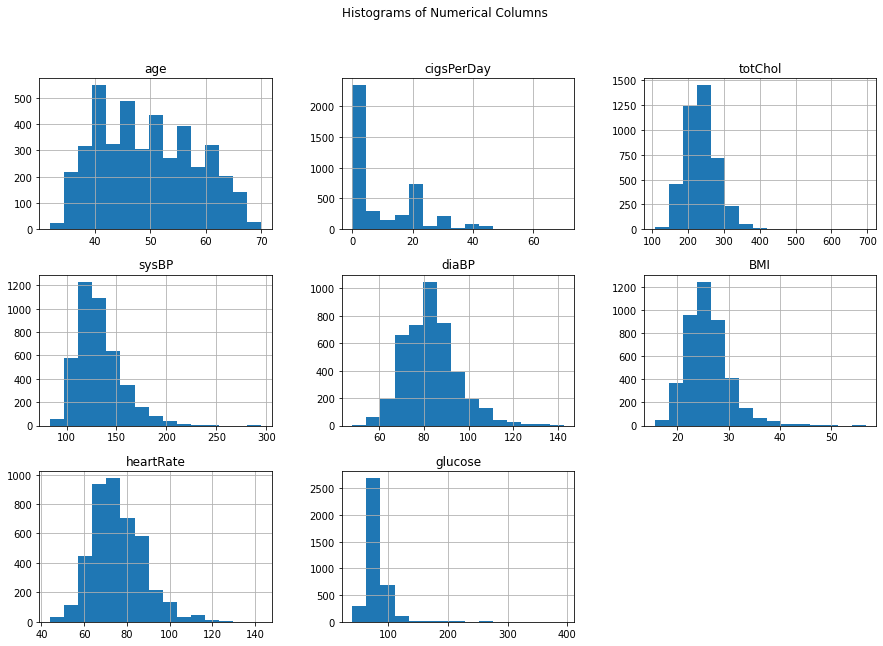

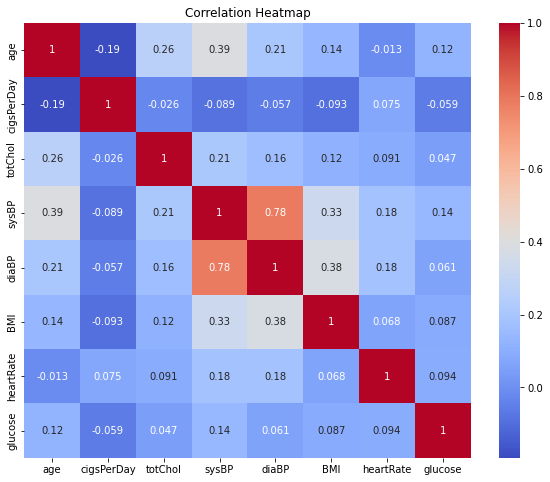

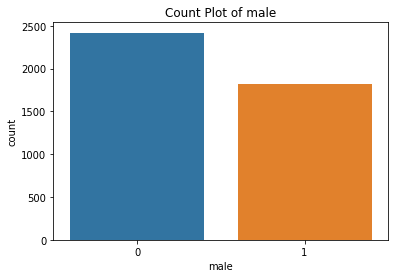

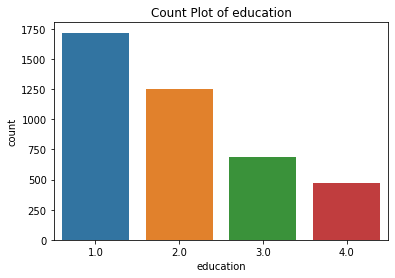

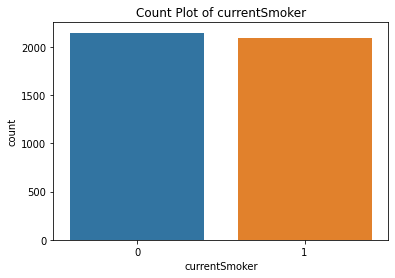

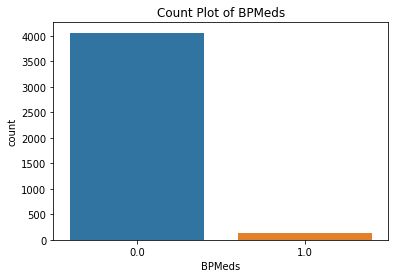

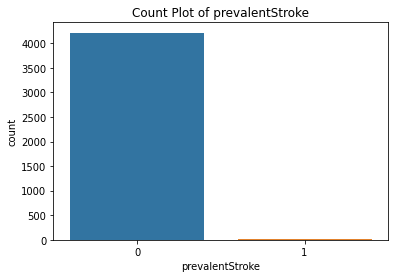

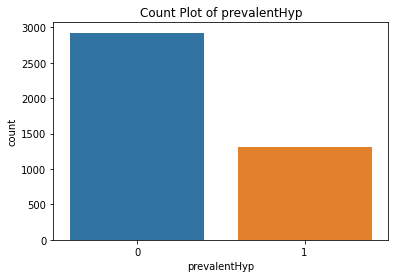

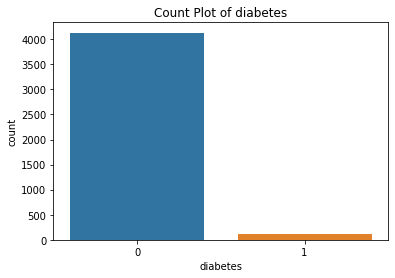

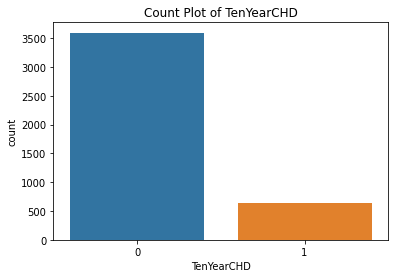

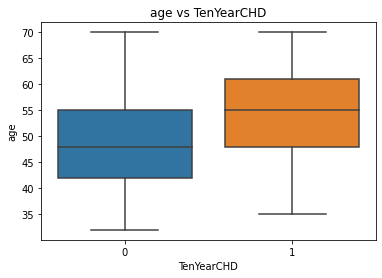

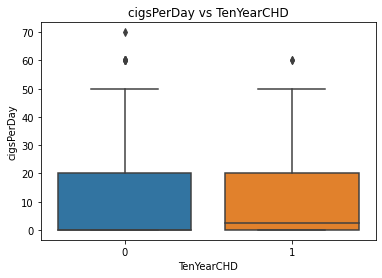

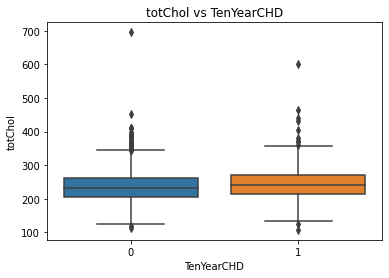

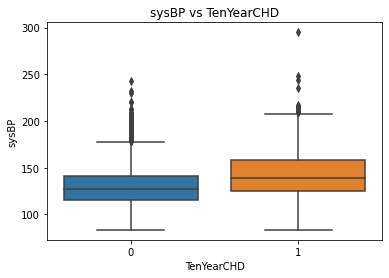

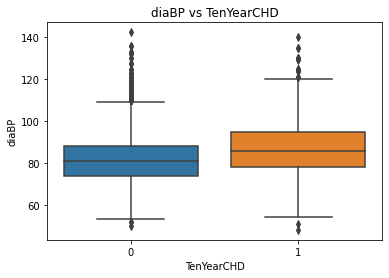

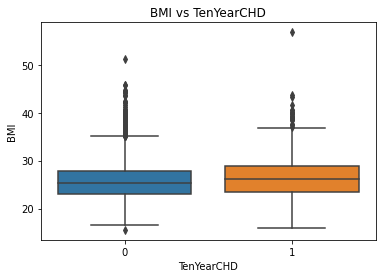

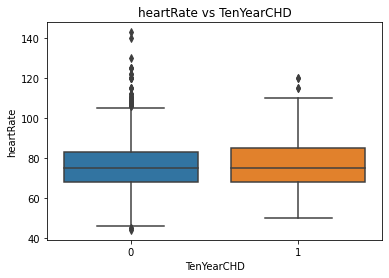

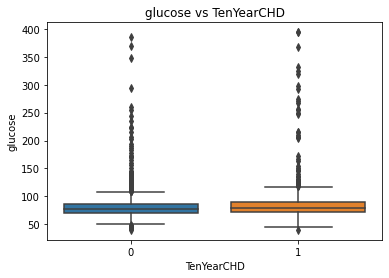

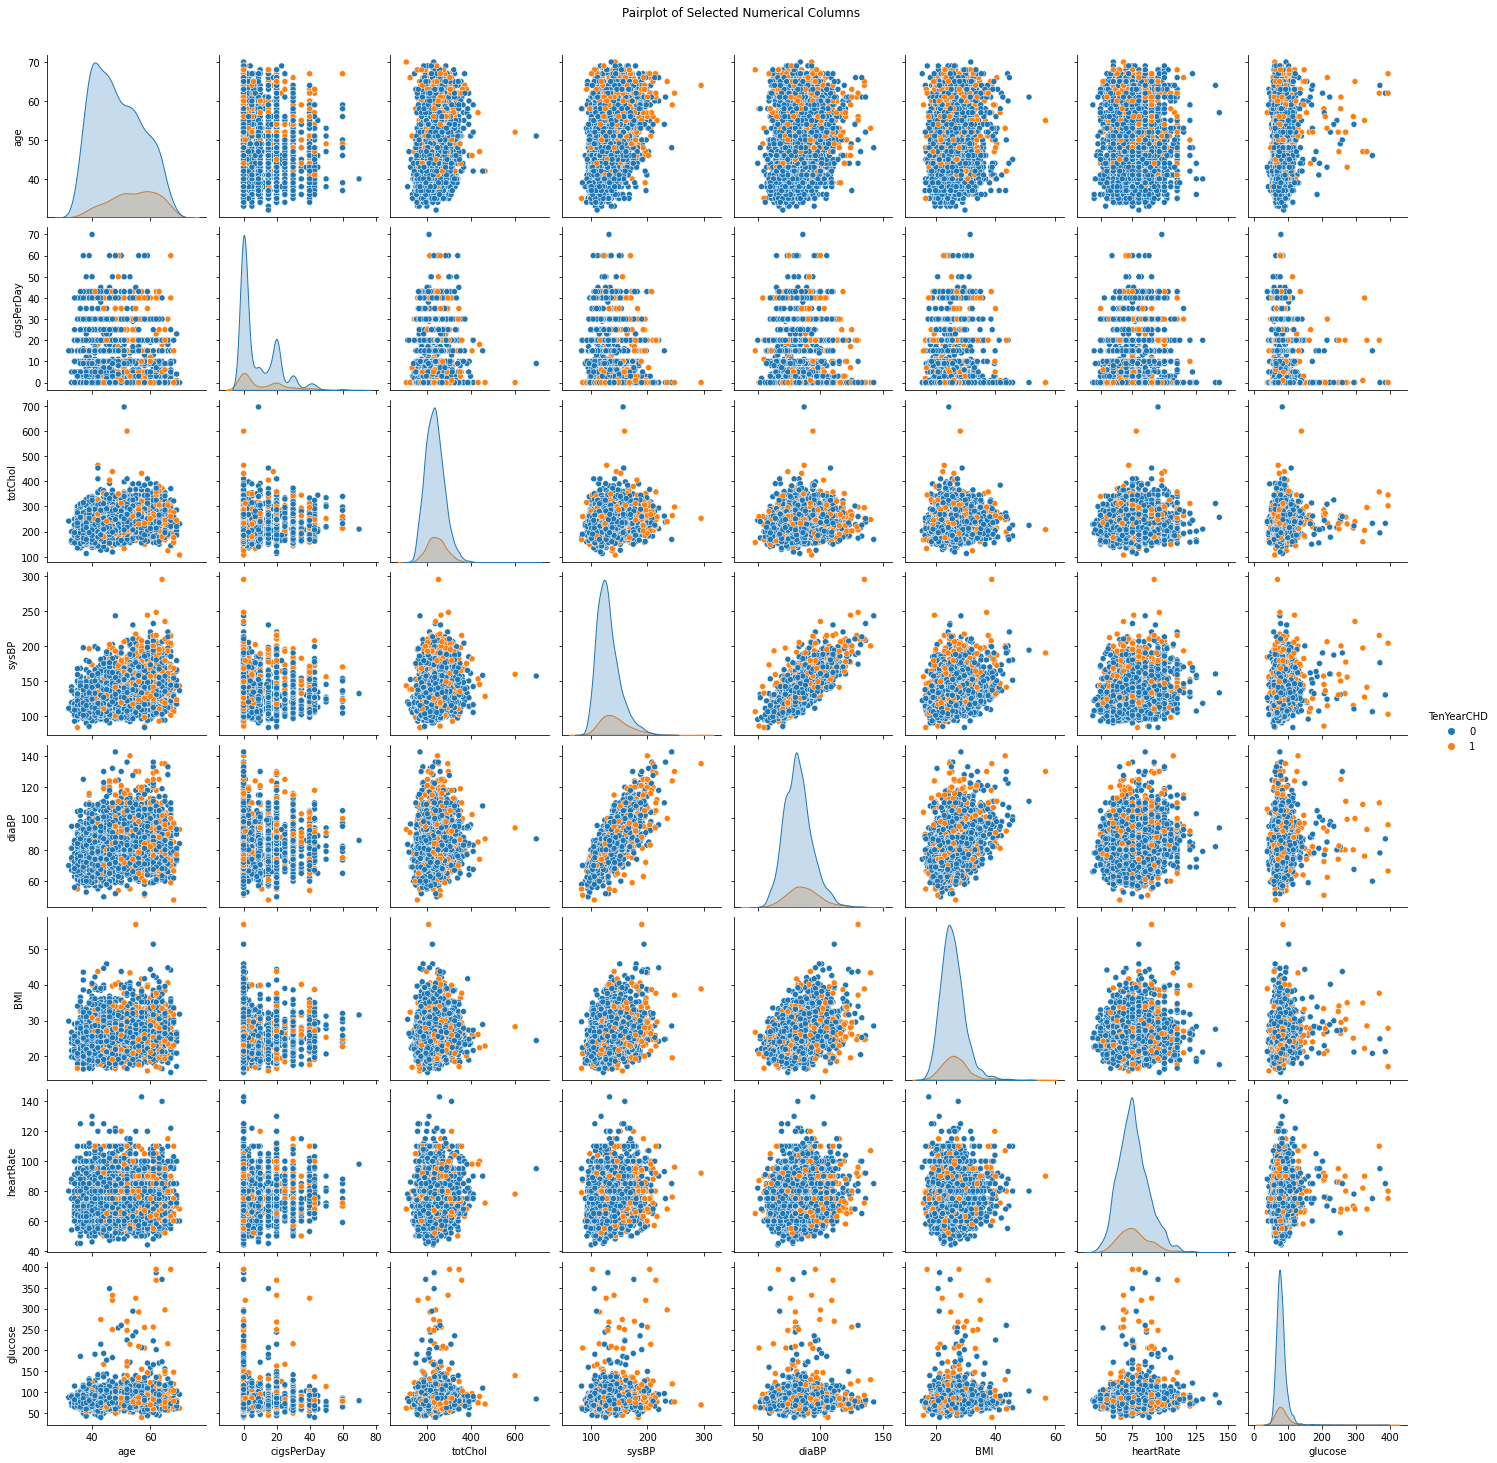

In [2]:


# Load dataset
df2 = pd.read_csv('framingham.csv')

# Define columns
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# 1. Histograms for numerical columns
df2[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df2[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Count plot for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df2)
    plt.title(f'Count Plot of {col}')
    plt.show()

# 4. Box plots for numerical variables against the target variable
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='TenYearCHD', y=col, data=df2)
    plt.title(f'{col} vs TenYearCHD')
    plt.show()

# 5. Pairplot for selected numerical variables
sns.pairplot(df2[numerical_columns + ['TenYearCHD']], hue='TenYearCHD', diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Columns', y=1.02)
plt.show()


In [3]:
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4239 non-null   int64  
 1   age              4239 non-null   int64  
 2   education        4134 non-null   float64
 3   currentSmoker    4239 non-null   int64  
 4   cigsPerDay       4210 non-null   float64
 5   BPMeds           4186 non-null   float64
 6   prevalentStroke  4239 non-null   int64  
 7   prevalentHyp     4239 non-null   int64  
 8   diabetes         4239 non-null   int64  
 9   totChol          4189 non-null   float64
 10  sysBP            4239 non-null   float64
 11  diaBP            4239 non-null   float64
 12  BMI              4220 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          3851 non-null   float64
 15  TenYearCHD       4239 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.0 KB


In [4]:
df2.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4239.000000,4239.000000,4134.000000,4239.000000,4210.000000,4186.000000,4239.000000,4239.000000,4239.000000,4189.000000,4239.000000,4239.000000,4220.000000,4238.000000,3851.000000,4239.000000
mean,0.429111,49.579146,1.979681,0.493984,9.003325,0.029623,0.005898,0.310451,0.025714,236.704942,132.351144,82.899858,25.801059,75.874233,81.962347,0.151923
std,0.495008,8.573685,1.019801,0.500023,11.922673,0.169564,0.076578,0.462733,0.158298,44.595227,22.034750,11.911015,4.080289,12.022793,23.957308,0.358988
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df2.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df2.drop_duplicates()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4235,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4236,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4237,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
for col in df2.columns:
    print(f'{col}: {len(df2[col].unique())}')

male: 2
age: 39
education: 5
currentSmoker: 2
cigsPerDay: 34
BPMeds: 3
prevalentStroke: 2
prevalentHyp: 2
diabetes: 2
totChol: 249
sysBP: 234
diaBP: 146
BMI: 1365
heartRate: 74
glucose: 144
TenYearCHD: 2


### Handling Missing Values

In [8]:
#columnss = [var for var in df2.columns if df2[var].isnull().mean() < 0.05 and df2[var].isnull().mean() > 0]
columnss = df2.columns
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_columns = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


In [9]:
for col in numerical_columns:
    mean = df2[col].mean()
    df2[col] = df2[col].fillna(mean)

In [10]:
for col in categorical_columns:
    mode = df2[col].mode()[0]
    df2[col] = df2[col].fillna(mode)

In [11]:
df2.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Handling Outliers

In [12]:
for col in numerical_columns:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df2[~((df2[col] < (Q1 - 1.5 * IQR)) | (df2[col] > (Q3 + 1.5 * IQR)))]

In [13]:
df2.shape

(3631, 16)

### Feature Scaling (Normalization)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in numerical_columns:
    df2[col] = scaler.fit_transform(df2[[col]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in numerical_columns:
    df2[col] = scaler.fit_transform(df2[[col]])

In [15]:
df2.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,4.0,0,0.00,0.0,0,0,0,0.319820,0.226131,0.298246,0.560363,0.593220,0.470588,0
1,0,0.368421,2.0,0,0.00,0.0,0,0,0,0.567568,0.376884,0.491228,0.654380,0.847458,0.450980,0
2,1,0.421053,1.0,1,0.40,0.0,0,0,0,0.545045,0.442211,0.473684,0.473291,0.508475,0.333333,0
3,0,0.763158,3.0,1,0.60,0.0,0,1,0,0.454955,0.668342,0.736842,0.646368,0.338983,0.980392,1
4,0,0.368421,3.0,1,0.46,0.0,0,0,0,0.725225,0.467337,0.543860,0.353632,0.677966,0.627451,0


### Checking Class Balance/Imbalance

In [16]:
class_counts = df2['TenYearCHD'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Class Counts:\n{class_counts}")
print(f"Imbalance Ratio: {imbalance_ratio}")

Class Counts:
0    3149
1     482
Name: TenYearCHD, dtype: int64
Imbalance Ratio: 6.533195020746888


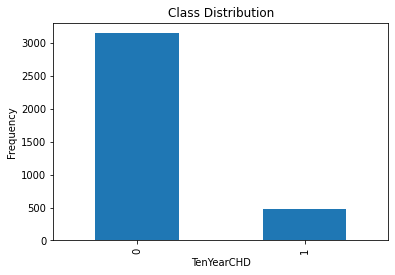

In [17]:
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("TenYearCHD")
plt.ylabel("Frequency")
plt.show()

### Data Oversampling

In [18]:
x = df2.drop(columns=['TenYearCHD'])
y = df2['TenYearCHD']

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [20]:
df2 = pd.concat([x,y], axis=1)
df2

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,4.0,0,0.00,0.0,0,0,0,0.319820,0.226131,0.298246,0.560363,0.593220,0.470588,0
1,0,0.368421,2.0,0,0.00,0.0,0,0,0,0.567568,0.376884,0.491228,0.654380,0.847458,0.450980,0
2,1,0.421053,1.0,1,0.40,0.0,0,0,0,0.545045,0.442211,0.473684,0.473291,0.508475,0.333333,0
3,0,0.763158,3.0,1,0.60,0.0,0,1,0,0.454955,0.668342,0.736842,0.646368,0.338983,0.980392,1
4,0,0.368421,3.0,1,0.46,0.0,0,0,0,0.725225,0.467337,0.543860,0.353632,0.677966,0.627451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,1,0.711972,1.0,0,0.00,0.0,0,0,0,0.529007,0.418576,0.519182,0.469704,0.355001,0.450980,1
6294,1,0.641233,1.0,0,0.00,0.0,0,0,0,0.252207,0.399712,0.470422,0.529566,0.500724,0.486649,1
6295,1,0.703723,1.0,0,0.00,0.0,0,1,0,0.547377,0.487785,0.754690,0.566463,0.593220,0.548680,1
6296,0,0.770698,1.0,0,0.00,0.0,0,0,0,0.626784,0.387914,0.289047,0.375726,0.392211,0.643239,1


In [21]:
x = df2.drop(columns=['TenYearCHD'])
y = df2['TenYearCHD']

Class Counts:
0    3149
1    3149
Name: TenYearCHD, dtype: int64
Imbalance Ratio: 1.0


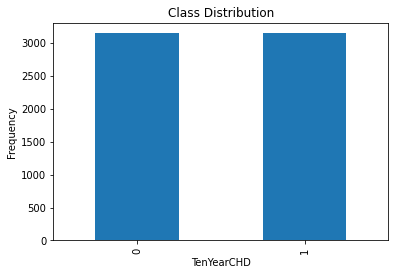

In [22]:
class_counts = df2['TenYearCHD'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Class Counts:\n{class_counts}")
print(f"Imbalance Ratio: {imbalance_ratio}")
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("TenYearCHD")
plt.ylabel("Frequency")
plt.show()

### Saving the Preprocessed Dataset

In [23]:
df2.to_csv('framingham_cleaned.csv', index=False)

### Splitting the Dataset

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train.shape , x_test.shape

((5038, 15), (1260, 15))

In [26]:
x_train.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2960,1,0.105263,1.0,1,0.400000,0.000000,0,0,0,0.355856,0.180905,0.245614,0.424679,0.338983,0.411765
6218,0,0.243444,2.0,0,0.000000,0.000000,0,0,0,0.381768,0.379545,0.364202,0.335178,0.413246,0.470656
6015,0,0.624857,1.0,1,0.067065,0.000000,0,0,0,0.613396,0.596406,0.652555,0.367452,0.393791,0.322888
1543,1,0.263158,2.0,1,0.400000,0.000000,0,0,0,0.360360,0.266332,0.350877,0.386752,0.254237,0.431373
4010,0,0.729990,2.0,0,0.000000,0.630187,0,1,0,0.316862,0.658841,0.623171,0.484730,0.345251,0.493969


In [27]:
# Data covariance
x_train.cov()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,0.249878,-0.001956,0.002578,0.056969,0.040089,-0.007089,0.000052,0.008758,-0.000162,-0.003917,0.003945,0.012463,0.014506,-0.008342,-0.000823
age,-0.001956,0.046889,-0.031638,-0.027448,-0.011088,0.003853,0.000683,0.031071,-0.000063,0.008160,0.015468,0.006448,0.005992,-0.001542,0.004460
education,0.002578,-0.031638,1.080420,0.003615,0.000770,-0.000435,-0.001792,-0.025576,0.000169,0.003057,-0.018624,-0.002133,-0.018304,-0.006539,-0.000769
currentSmoker,0.056969,-0.027448,0.003615,0.249175,0.095274,-0.007545,0.000081,-0.027978,-0.000082,-0.001383,-0.011124,-0.007409,-0.013942,0.009532,-0.008518
cigsPerDay,0.040089,-0.011088,0.000770,0.095274,0.056508,-0.003179,-0.000124,-0.008618,-0.000079,0.000505,-0.002793,-0.001624,-0.003229,0.004908,-0.004185
BPMeds,-0.007089,0.003853,-0.000435,-0.007545,-0.003179,0.023782,0.000493,0.017143,0.000127,0.000225,0.005433,0.003910,0.000546,-0.000423,-0.001008
prevalentStroke,0.000052,0.000683,-0.001792,0.000081,-0.000124,0.000493,0.003955,0.002243,-0.000011,0.000026,0.000884,0.000875,0.000127,0.000128,-0.000120
prevalentHyp,0.008758,0.031071,-0.025576,-0.027978,-0.008618,0.017143,0.002243,0.222837,0.000260,0.008304,0.062575,0.052265,0.023477,0.009504,0.006562
diabetes,-0.000162,-0.000063,0.000169,-0.000082,-0.000079,0.000127,-0.000011,0.000260,0.002772,0.000083,0.000047,0.000024,-0.000130,0.000085,0.000085
totChol,-0.003917,0.008160,0.003057,-0.001383,0.000505,0.000225,0.000026,0.008304,0.000083,0.029029,0.004469,0.003920,0.004167,0.002282,-0.000046


In [28]:
# Data correlation
x_train.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.018075,0.004962,0.228308,0.337369,-0.091954,0.001655,0.037114,-0.006160,-0.045986,0.043420,0.140029,0.164554,-0.096397,-0.008926
age,-0.018075,1.000000,-0.140564,-0.253935,-0.215408,0.115387,0.050184,0.303962,-0.005526,0.221179,0.393010,0.167254,0.156916,-0.041134,0.111639
education,0.004962,-0.140564,1.000000,0.006968,0.003117,-0.002716,-0.027410,-0.052124,0.003082,0.017263,-0.098578,-0.011527,-0.099859,-0.036337,-0.004012
currentSmoker,0.228308,-0.253935,0.006968,1.000000,0.802918,-0.098013,0.002583,-0.118731,-0.003128,-0.016264,-0.122609,-0.083357,-0.158379,0.110297,-0.092490
cigsPerDay,0.337369,-0.215408,0.003117,0.802918,1.000000,-0.086729,-0.008266,-0.076803,-0.006318,0.012479,-0.064639,-0.038365,-0.077037,0.119255,-0.095435
BPMeds,-0.091954,0.115387,-0.002716,-0.098013,-0.086729,1.000000,0.050860,0.235484,0.015629,0.008565,0.193840,0.142389,0.020069,-0.015828,-0.035427
prevalentStroke,0.001655,0.050184,-0.027410,0.002583,-0.008266,0.050860,1.000000,0.075563,-0.003333,0.002413,0.077306,0.078169,0.011458,0.011736,-0.010351
prevalentHyp,0.037114,0.303962,-0.052124,-0.118731,-0.076803,0.235484,0.075563,1.000000,0.010459,0.103251,0.729292,0.621831,0.282014,0.116292,0.075346
diabetes,-0.006160,-0.005526,0.003082,-0.003128,-0.006318,0.015629,-0.003333,0.010459,1.000000,0.009284,0.004952,0.002608,-0.013994,0.009298,0.008798
totChol,-0.045986,0.221179,0.017263,-0.016264,0.012479,0.008565,0.002413,0.103251,0.009284,1.000000,0.144303,0.129218,0.138691,0.077375,-0.001459


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(x_train, y_train)

# You can now use the trained model to make predictions
y_pred = model.predict(x_test)

# To evaluate the model, you can compute the accuracy
accuracy = model.score(x_test, y_test)
print(f"Model Accuracy: {accuracy}")

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,output_dict=True)

# Results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Model Accuracy: 0.6857142857142857
Accuracy: 0.6857142857142857

Confusion Matrix:
 [[412 214]
 [182 452]]

Classification Report:
 {'0': {'precision': 0.6936026936026936, 'recall': 0.65814696485623, 'f1-score': 0.6754098360655738, 'support': 626.0}, '1': {'precision': 0.6786786786786787, 'recall': 0.7129337539432177, 'f1-score': 0.6953846153846154, 'support': 634.0}, 'accuracy': 0.6857142857142857, 'macro avg': {'precision': 0.6861406861406861, 'recall': 0.6855403593997238, 'f1-score': 0.6853972257250946, 'support': 1260.0}, 'weighted avg': {'precision': 0.6860933083155305, 'recall': 0.6857142857142857, 'f1-score': 0.6854606377229328, 'support': 1260.0}}


In [30]:
# Test an input
test_input = np.array([[0,0.8157894736842104,1.0,0,0.0,0.0,0,0,0,0.16638370118845502,0.25768321513002357,0.24338624338624337,0.42583616093068344,0.1616161616161616,0.1271186440677966]])  # A single input with 2 features

# Predict class
predicted_class = model.predict(test_input)
print("Predicted Class:", predicted_class[0])

# Predict probabilities for each class
predicted_probabilities = model.predict_proba(test_input)
print("Predicted Probabilities:", predicted_probabilities)



Predicted Class: 1
Predicted Probabilities: [[0.46918689 0.53081311]]


c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

# Perform cross-validation
scores = cross_val_score(knn, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the average accuracy
print("Average accuracy:", scores.mean())



# To evaluate the model, you can compute the accuracy
y_pred = knn.predict(x_test)
KNN_accuracy = knn.score(x_test, y_test)
print(f"Model Accuracy: {KNN_accuracy}")


# Model Evaluation

KNN_conf_matrix = confusion_matrix(y_test, y_pred)
KNN_class_report = classification_report(y_test, y_pred,output_dict=True)

# Results
print("Accuracy:", KNN_accuracy)
print("\nConfusion Matrix:\n", KNN_conf_matrix)
print("\nClassification Report:\n", KNN_class_report)



Cross-validation scores: [0.81845238 0.80753968 0.82539683 0.8182721  0.79841112]
Average accuracy: 0.8136144212733092
Model Accuracy: 0.8142857142857143
Accuracy: 0.8142857142857143

Confusion Matrix:
 [[409 217]
 [ 17 617]]

Classification Report:
 {'0': {'precision': 0.960093896713615, 'recall': 0.6533546325878594, 'f1-score': 0.7775665399239544, 'support': 626.0}, '1': {'precision': 0.7398081534772182, 'recall': 0.973186119873817, 'f1-score': 0.840599455040872, 'support': 634.0}, 'accuracy': 0.8142857142857143, 'macro avg': {'precision': 0.8499510250954165, 'recall': 0.8132703762308382, 'f1-score': 0.8090829974824132, 'support': 1260.0}, 'weighted avg': {'precision': 0.8492517052756184, 'recall': 0.8142857142857143, 'f1-score': 0.8092831019748479, 'support': 1260.0}}


In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight='balanced')
RF.fit(x_train, y_train)

# Perform cross-validation
scores = cross_val_score(RF, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the average accuracy
print("Average accuracy:", scores.mean())

# Model Evaluation
y_pred = RF.predict(x_test)
RF_accuracy = accuracy_score(y_test, y_pred)
RF_conf_matrix = confusion_matrix(y_test, y_pred)
RF_class_report = classification_report(y_test, y_pred, output_dict=True)

# Results
print("Accuracy:", RF_accuracy)
print("\nConfusion Matrix:\n", RF_conf_matrix)
print("\nClassification Report:\n", RF_class_report)


Cross-validation scores: [0.87202381 0.88888889 0.90178571 0.88083416 0.86295929]
Average accuracy: 0.8812983717154521
Accuracy: 0.9007936507936508

Confusion Matrix:
 [[557  69]
 [ 56 578]]

Classification Report:
 {'0': {'precision': 0.9086460032626428, 'recall': 0.889776357827476, 'f1-score': 0.8991121872477804, 'support': 626.0}, '1': {'precision': 0.893353941267388, 'recall': 0.9116719242902208, 'f1-score': 0.9024199843871975, 'support': 634.0}, 'accuracy': 0.9007936507936508, 'macro avg': {'precision': 0.9009999722650154, 'recall': 0.9007241410588485, 'f1-score': 0.900766085817489, 'support': 1260.0}, 'weighted avg': {'precision': 0.9009514260364591, 'recall': 0.9007936507936508, 'f1-score': 0.9007765867607888, 'support': 1260.0}}


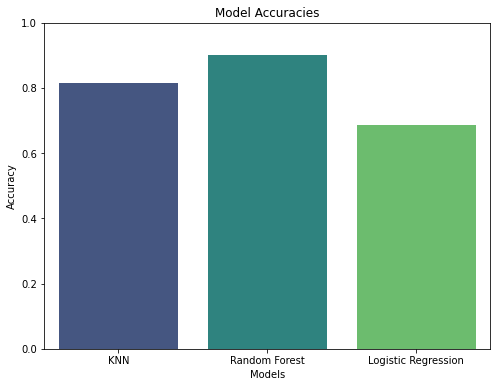

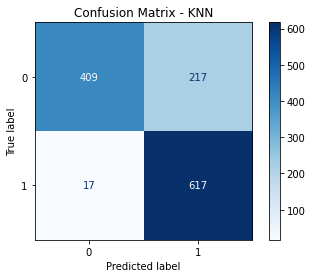

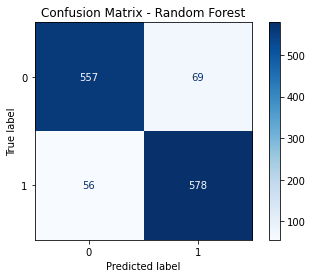

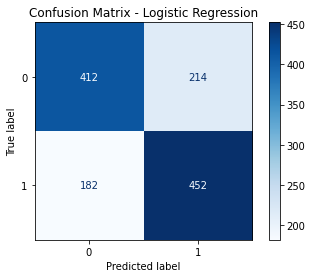

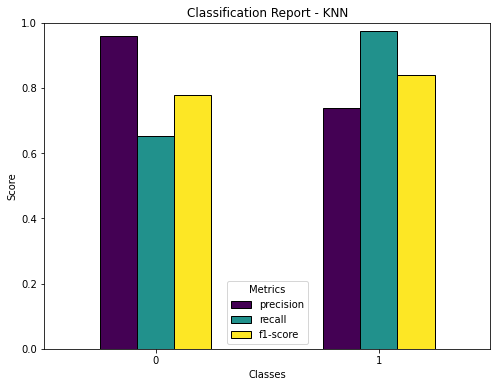

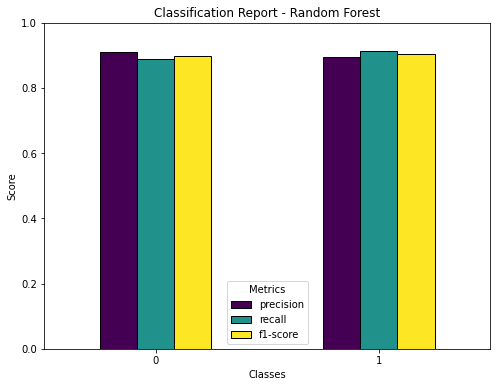

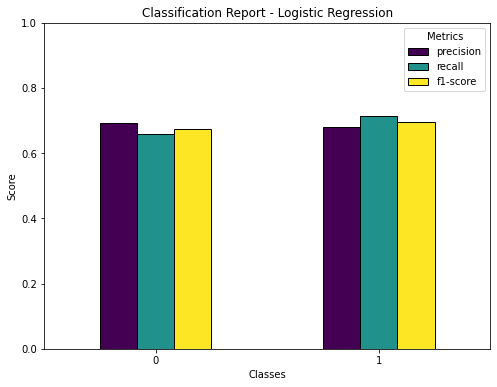

In [33]:
model_names = ['KNN', 'Random Forest', 'Logistic Regression']

accuracies = [KNN_accuracy, RF_accuracy, accuracy]
confusion_matrices = [KNN_conf_matrix, RF_conf_matrix, conf_matrix]
classification_reports = [KNN_class_report, RF_class_report, class_report]

# 1. Plot Model Accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

# 2. Plot Confusion Matrices
for i, cm in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {model_names[i]}')
    plt.show()

# 3. Plot Classification Reports
for i, report in enumerate(classification_reports):
    # Extract metrics for each class and overall averages
    metrics_df = pd.DataFrame(report).T  # Transpose to get classes as rows and metrics as columns
    metrics_df = metrics_df[['precision', 'recall', 'f1-score']]  # Only keep these metrics
    metrics_df = metrics_df.loc[[cls for cls in metrics_df.index if cls not in ['accuracy', 'macro avg', 'weighted avg']]]

    # Plot metrics for each class
    metrics_df.plot(kind='bar', figsize=(8, 6), colormap='viridis', edgecolor='black')
    plt.title(f'Classification Report - {model_names[i]}')
    plt.ylabel('Score')
    plt.xlabel('Classes')
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(title='Metrics')
    plt.show()


In [34]:

# Manually input data for prediction
manual_input = np.array([[1,0.10526315789473684,4.0,1,0.5,0.0,0,0,0,0.3191850594227504,0.08747044917257679,0.21164021164021163,0.3056228793019874,0.1616161616161616,0.06497175141242938]])  # Example values

# Make a prediction based on the manual input
expected_output = 0
prediction = model.predict(manual_input)
prediction2 = knn.predict(manual_input)
prediction3 = RF.predict(manual_input)

# Print the prediction
print(f"Prediction for manual input: {prediction[0]}")
print(f"Prediction for manual input: {prediction2[0]}")
print(f"Prediction for manual input: {prediction3[0]}")



Prediction for manual input: 0
Prediction for manual input: 0
Prediction for manual input: 0


c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
